In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import random

### 3. Rewrite the sloshing model as a system of ordinary differential equations (ODEs) based on equation (4) from the paper

The equation (4) from the paper is the following 
$$u'' + [1 + \epsilon \lambda \Omega^2 cos(\Omega \tau)]\Big(u - \frac{\epsilon^2 u^3}{6}\Big) = 0$$

Solving for $u''$ we have
$$u'' = - [1 + \epsilon \lambda \Omega^2 cos(\Omega \tau)]\Big(u - \frac{\epsilon^2 u^3}{6}\Big)$$

Let $y_1 = u, y_2 = u'$,  we can write the sloshing model as the following system of ODE

$$
\begin{cases}
    \frac{dy_1}{d\tau} = y_2 \\
    \frac{dy_2}{d\tau} = [1 + \epsilon \lambda \Omega^2 cos(\Omega \tau)]\Big(y_1 - \frac{\epsilon^2 y_1^3}{6}\Big)
\end{cases}
$$

In [2]:
def verticalMotion(tau, system, omega, lambd, epsilon):
    """
    Ordinary Differential Equation from the paper labeled as (4)
    As a system of first-grade ordinary differential equations
    
    Args:
        tau: parameter of the ordinary differential equation (4)
        system: [y1, y2]

    Return
        [dy1/d_tau, d_y2/d_tau]
    """
    y1, y2 = system

    dy1dtau = y2
    dy2dtau = - (1 + epsilon * lambd * omega**2 * np.cos(omega * tau)) * (y1 - epsilon**2 * y1**3/6) 

    return np.array([dy1dtau, dy2dtau])

### 4. Solve the system numerically using solve ivp from SciPy for two different sets of parameters.

In [3]:
# Parameters as list
omega = [2, 1]
lambd = [0.1, 0.2]
epsilon = [0.2, 0.5]
y1_0 = [0.5, 0]
y2_0 = [0.5, 2]
tau_0 = [0, 0]
tau_max = [50, 30]

for i in range(2):
    print(f"\n===== Parameter Set {i + 1} =====")
    print(f"Omega     : {omega[i]}")
    print(f"Lambda    : {lambd[i]}")
    print(f"Epsilon   : {epsilon[i]}")
    print(f"y1_0      : {y1_0[i]}")
    print(f"y2_0      : {y2_0[i]}")
    print(f"tau_0     : {tau_0[i]}")
    print(f"tau_max   : {tau_max[i]}")
    print("=" * 30)


===== Parameter Set 1 =====
Omega     : 2
Lambda    : 0.1
Epsilon   : 0.2
y1_0      : 0.5
y2_0      : 0.5
tau_0     : 0
tau_max   : 50

===== Parameter Set 2 =====
Omega     : 1
Lambda    : 0.2
Epsilon   : 0.5
y1_0      : 0
y2_0      : 2
tau_0     : 0
tau_max   : 30


In [4]:
def quick_summary_data(tau, y1, y2, m=5):
    """
    Prints a quick summary for the given data(from a numerical solution) of the sloshing model by selecting a random sample of points.

    Args:
        tau (list or array-like): A sequence of numerical values representing the tau values.
        y1 (list or array-like): A sequence of numerical values representing the y1 function values.
        y2 (list or array-like): A sequence of numerical values representing the y2 function values.
        m (int, optional): The number of random samples to display. Default is 5.

    Returns:
        None: The function prints a formatted table but does not return any value.
    """
    
    n = len(tau) # # Number of data points
    random_indexes = sorted(random.sample(range(n), m))

    # Print table header
    print(f"{'Index':<5} {'tau':<10} {'y1':<10} {'y2':<10}")
    print("-" * 35)

    # Print selected random rows
    for i in random_indexes:
        print(f"{i:<5} {tau[i]:<10.4f} {y1[i]:<10.4f} {y2[i]:<10.4f}")


def solve_numerically(index, summary=False):
    """
    Solves the sloshing model numerically with set of parameters[index].

    Args:
        index (int): Index specifying which set of initial conditions and parameters to use.
        summary (bool, optional): If True, prints a summary of the numerical solution. Default is False.

    Returns:
        tuple: (tau, y1, y2)
            - tau (numpy.ndarray): tau values of the numerical solution.
            - y1 (numpy.ndarray): y1 function values of the numerical solution.
            - y2 (numpy.ndarray): y2 function values of the numerical solution.
    """
    
    # PARAMETERS
    # Extract initial conditions for the given index
    initial_conditions = [y1_0[index], y2_0[index]]

    # Define range for solving the differential equations
    tl = tau_0[index]
    tr = tau_max[index]

    # The system expect this parameters
    parameters = (omega[index], lambd[index], epsilon[index])

    # SOLVE DIFFERENTIAL EQUATIONS
    # Use SciPy solve_ivp to numerically solve the system of ODEs
    sol_scipy = scipy.integrate.solve_ivp(
        verticalMotion, # Function defining the system of ODEs
        (tl, tr), # Domain
        initial_conditions, 
        args=(parameters), # The system depends of extra parameters like Omega
    ) 
    
    # Extract solution components
    tau = sol_scipy.t
    y1 = (sol_scipy.y)[0]
    y2 = (sol_scipy.y)[1]

    # If summary is enabled, print a quick summary of the solution
    if summary:
        quick_summary_data(tau, y1, y2)

    # Return the computed values as a tuple
    return (tau, y1, y2)
    

First Set of Parameters

In [5]:
tau, y1, y2 = solve_numerically(0, summary=True)

Index tau        y1         y2        
-----------------------------------
1     0.0986     0.5466     0.4444    
7     5.8871     0.2312     0.5875    
19    17.2741    -0.3607    0.3469    
20    18.2082    0.0582     0.4887    
35    32.2679    0.3703     -0.0247   


Second Set of Parameters

In [6]:
tau, y1, y2 = solve_numerically(1, summary=True)

Index tau        y1         y2        
-----------------------------------
0     0.0000     0.0000     2.0000    
26    23.3497    0.4266     -1.8285   
27    24.2780    -1.2063    -1.4302   
32    29.3045    1.5950     -1.1260   
33    30.0000    0.5342     -1.8299   


### 5. Present and analyze the numerical results using well-labeled graphs. Clearly document the parameter values used and discuss their impact on the sloshing behavior.

In [7]:
def graph_results(tau, y1, y2):
    """
    Plots the numerical solution of sloshing model, displaying the function and its derivative.

    Args:
        tau (numpy.ndarray): tau values of the numerical solution.
        y1 (numpy.ndarray): y1 values (solution of the function).
        y2 (numpy.ndarray): y2 values (derivative of the function).

    Returns:
        None: Displays the plots but does not return any values.
    """

    # Create two subplots in a single row to visualize the function and its derivative
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # First subplot: Graph of y1 (function u(tau))
    axes[0].plot(tau, y1, label="u(tau) scipy")
    axes[0].set_xlabel("tau")
    axes[0].set_ylabel("???")
    axes[0].set_title("Vertical motion of the pivot: Method of Averaging")
    axes[0].legend()
    
    # First subplot: Graph of y1 (function u(tau))
    axes[1].plot(tau, y2, label="u'(tau) scipy")
    axes[1].set_xlabel("tau")
    axes[1].set_ylabel("???")
    axes[1].set_title("Vertical motion of the pivot: Method of Averaging")
    axes[1].legend()

    plt.tight_layout() # Adjust subplot layout to prevent overlapping labels

    # Display the plots
    plt.show()

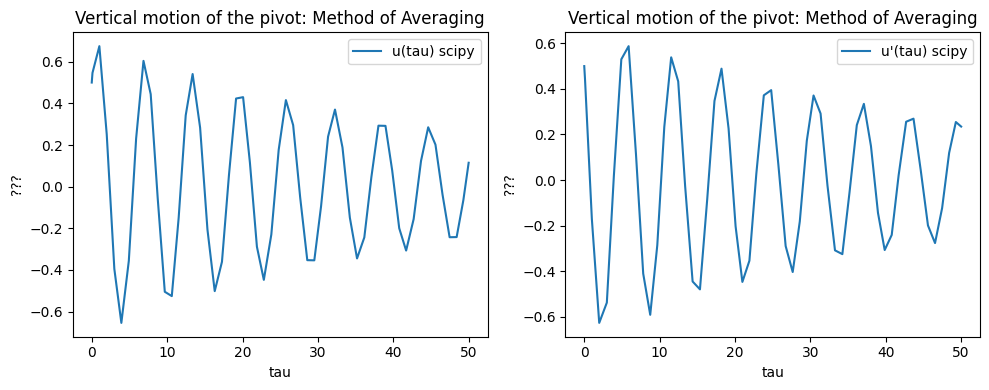

In [8]:
graph_results(*solve_numerically(0))

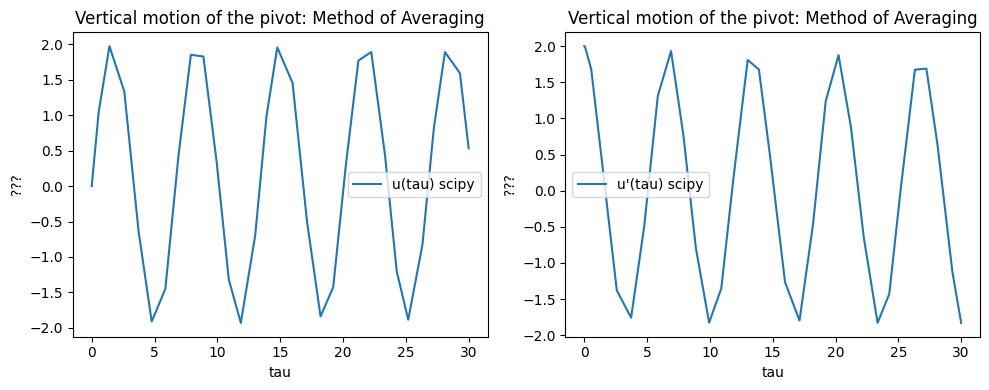

In [9]:
graph_results(*solve_numerically(1))

### 6. Implement one additional numerical method, such as Euler, Modified Euler, or Heun.

#### Runge Kutta

In [10]:
def rungeKuttaStep(f, dt, t0, w0, *args):
    """
    Given wi aproximation, apply a runge kutta step to calculate w(i+1)
    
    Args:
        f (Callable) : the function f that where dy/dt = f(y, t)
        dt (float) : size of the step
        t0 (float) : current point at time, correspond to the time of wi
        w0 (float) : current approximation at time, note that w0 = wi
    
    Return:
        w(i+1) the next point in the integration
    """
    
    f1 = f(t0, w0, *args)
    f2 = f(t0 + (dt / 2), w0 + (dt / 2) * f1, *args)
    f3 = f(t0 + (dt / 2), w0 + (dt / 2) * f2, *args)
    f4 = f(t0 + dt, w0 + dt * f3, *args)

    return w0 + (dt / 6) * (f1 + 2*f2 + 2*f3 + f4)


def rungeKuttaSolver(system, initial_conditions, t0, t_max, dt, *args):
    """
    Solves a system of first-order ordinary differential equations (ODEs) using the 4th-order Runge-Kutta method.

    Args:
        system (Callable) : A function that represents the system of ODE, can be only one
        initial_conditions (list[float]) : [u_1(t0), u_2(t0), ..., u_m(t0)]   
        t0 (float) : initial value for the system
        t_max (float) : max value for the system
        dt (float) : size of each step in the integration

    Return:
        tuple:
            np.array : the values at which we are aproximatting
            np.array : 2D vector where the value at the i row, j col is the aproximation of u_i on t_j 
    """

    m = 1 if np.isscalar(initial_conditions) else len(initial_conditions)
    points = int((t_max - t0) / dt)
    
    t = np.zeros(points)
    y = np.zeros((m, points))

    y[:, 0] = initial_conditions
    t[0] = t0

    for i in range(points - 1):
        t[i + 1] = t[i] + dt
        y[:, i + 1] = rungeKuttaStep(system, dt, t[i], y[:, i], *args)

    return t, y

### 7. Compare your results with those obtained from solve ivp and discuss any discrepancies.

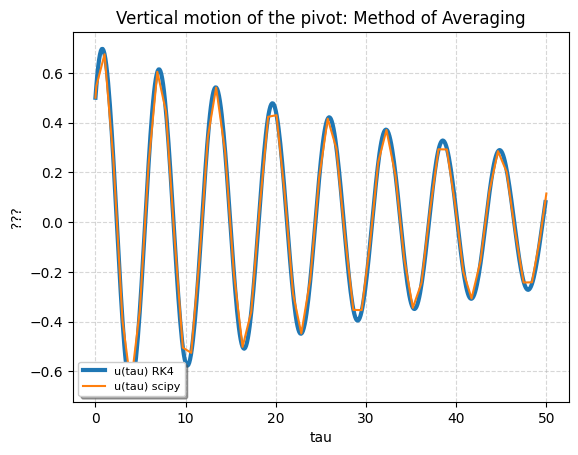

In [11]:
# PARAMETERS
initial_conditions = [y1_0[0], y2_0[0]]
tl = tau_0[0]
tr = tau_max[0]
parameters = (omega[0], lambd[0], epsilon[0])
delta_tau = 0.1

# SOLVE DIFFERENTIAL EQUATIONS
scipy_sol = scipy.integrate.solve_ivp(verticalMotion, (tl, tr), initial_conditions, args=(parameters)) # scipy solution
tau, rk4_u = rungeKuttaSolver(verticalMotion, initial_conditions, tl, tr, delta_tau, *parameters) # my solution
scipy_u = scipy_sol.y
scipy_tau = scipy_sol.t

# PLOT AND COMPARE
plt.plot(tau, rk4_u[0], label="u(tau) RK4", linewidth=3) # u[0] refers to the 0 derivative of u, that means the u function itself
plt.plot(scipy_tau, scipy_u[0], label="u(tau) scipy")
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("tau")
plt.ylabel("???")
plt.title("Vertical motion of the pivot: Method of Averaging")
plt.legend(loc="lower left", frameon=True, shadow=True, fontsize=8)
plt.show()

Plot for different values for $dt$

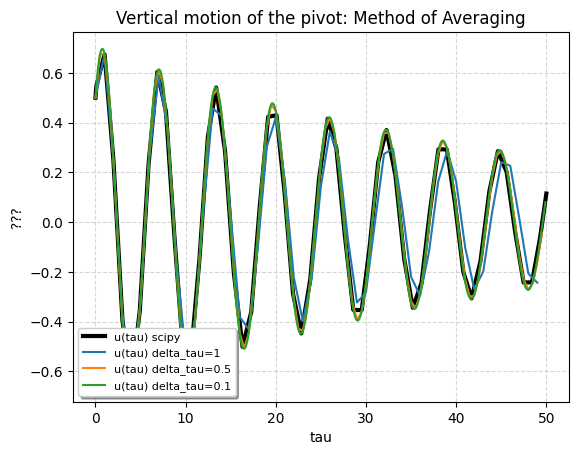

In [12]:
# PARAMETERS
initial_conditions = [y1_0[0], y2_0[0]]
tl = tau_0[0]
tr = tau_max[0]
parameters = (omega[0], lambd[0], epsilon[0])
delta_tau_values = [1, 0.5, 0.1]

# SOLVE DIFFERENTIAL EQUATIONS
scipy_sol = scipy.integrate.solve_ivp(verticalMotion, (tl, tr), initial_conditions, args=(parameters)) # scipy solution
scipy_u = scipy_sol.y
scipy_t = scipy_sol.t

plt.plot(scipy_t, scipy_u[0], label="u(tau) scipy", linewidth=3, color="black") # PLOT SCIPY SOLUTION

# SOLVE FOR EACH dt
for delta_tau in delta_tau_values:
    tau, rk4_u = rungeKuttaSolver(verticalMotion, initial_conditions, tl, tr, delta_tau, *parameters) # my solution
    plt.plot(tau, rk4_u[0], label=f"u(tau) delta_tau={delta_tau}") # PLOT delta_tau SOLUTION

# PLOT OPTIONS
plt.grid(True, linestyle="--", alpha=0.5)
plt.xlabel("tau")
plt.ylabel("???")
plt.title("Vertical motion of the pivot: Method of Averaging")
plt.legend(loc="lower left", frameon=True, shadow=True, fontsize=8)    
plt.show()